# Linear Models

## Ordinary Least Squares

In [26]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit([[0,0], [1, 1],  [2, 2]], [0, 1, 2])



LinearRegression()

In [27]:
reg.coef_

array([0.5, 0.5])

### Data Loading and Preparation

In [28]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]] # use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear regression model

In [29]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

### Model evaluation

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squeared error: {mean_squared_error(y_test, y_pred)}" )
print(f"R2 score: {r2_score(y_test, y_pred)}")

Mean squeared error: 4061.8259284949268
R2 score: 0.23335039815872138


### Plotting the results

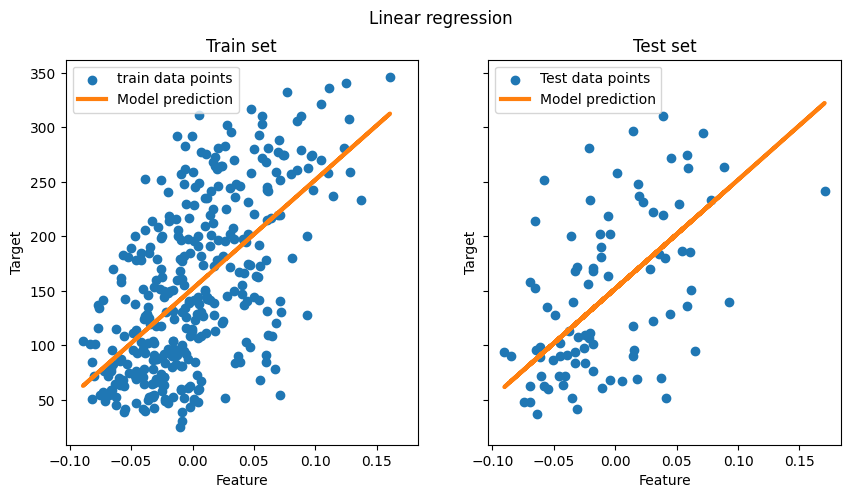

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model prediction",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(
    X_test,
    regressor.predict(X_test),
    linewidth=3,
    color="tab:orange",
    label="Model prediction",
)
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear regression")
plt.show()

### Non-Negative Least Squares

In this example, we fit a linear model with positive constraints on the regression coefficients and compare the estimated coefficients to a classic linear regression.

In [32]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score

Generate some random data

In [33]:
np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)  

# add some noise
y += 5 * np.random.normal(size=(n_samples,))

In [34]:
# pass X to a df
import pandas as pd
df_x = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(n_features)])
df_x.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,...,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040
1,0.324084,-0.385082,-0.676922,0.611676,1.031000,0.931280,-0.839218,-0.309212,0.331263,0.975545,...,0.097078,0.968645,-0.702053,-0.327662,-0.392108,-1.463515,0.296120,0.261055,0.005113,-0.234587
2,-1.415371,-0.420645,-0.342715,-0.802277,-0.161286,0.404051,1.886186,0.174578,0.257550,-0.074446,...,0.227460,1.307143,-1.607483,0.184634,0.259883,0.781823,-1.236951,-1.320457,0.521942,0.296985
3,0.250493,0.346448,-0.680025,0.232254,0.293072,-0.714351,1.865775,0.473833,-1.191303,0.656554,...,-0.446515,0.856399,0.214094,-1.245739,0.173181,0.385317,-0.883857,0.153725,0.058209,-1.142970
4,0.357787,0.560785,1.083051,1.053802,-1.377669,-0.937825,0.515035,0.513786,0.515048,3.852731,...,-0.792521,-0.114736,0.504987,0.865755,-1.200296,-0.334501,-0.474945,-0.653329,1.765454,0.404982


Split the data in train set and test set

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Fit the Non-Negative least squares.

In [36]:
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
reg_nnls = reg_nnls.fit(X_train, y_train)
y_pred_nnls = reg_nnls.predict(X_test)
r2_score(y_test, y_pred_nnls)

0.8225220806196526

Fit an OLS.

In [37]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score(y_test, y_pred_ols)    
print(f"R2 score for OLS: {r2_score(y_test, y_pred_ols)}")

R2 score for OLS: 0.7436926291700345


Text(0, 0.5, 'NNLS regression coefficients')

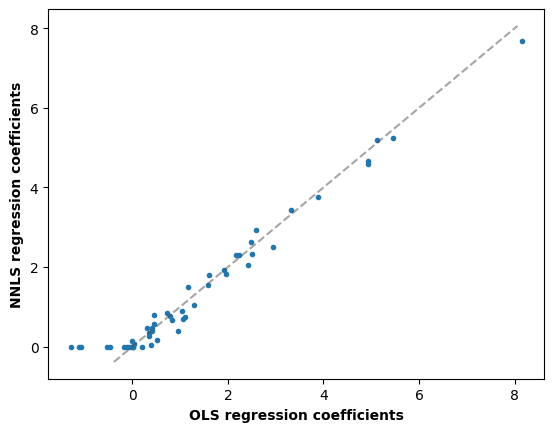

In [38]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, hight_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, hight_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

## Ridge regression and classification


### Regression

In [39]:
from sklearn import linear_model

reg = linear_model.Ridge(alpha=0.5)
reg.fit([[0,0], [1, 1],  [2, 2]], [0, 1, 2])
reg.coef_

array([0.44444444, 0.44444444])

In [40]:
reg.intercept_

np.float64(0.11111111111111116)

In [41]:
from sklearn.linear_model import RidgeCV

# Try a range of alpha values
alphas = [0.1, 0.5, 1.0, 10.0, 100.0]

# RidgeCV does cross-validation to find the best alpha
reg_cv = RidgeCV(alphas=alphas, store_cv_values=True)
reg_cv.fit([[0,0], [1, 1],  [2, 2]], [0, 1, 2])

print("Best alpha:", reg_cv.alpha_)
print("Coefficients:", reg_cv.coef_)
print("Intercept:", reg_cv.intercept_)


Best alpha: 0.1
Coefficients: [0.48780488 0.48780488]
Intercept: 0.0243902439024275


c:\Users\quine\Documents\repos_github\notebooks\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [42]:
from sklearn.linear_model import RidgeCV

# Try a range of alpha values
alphas=np.logspace(-6, 6, 13)

# RidgeCV does cross-validation to find the best alpha
reg_cv = RidgeCV(alphas=alphas, store_cv_values=True)
reg_cv.fit([[0,0], [1, 1],  [2, 2]], [0, 1, 2])

print("Best alpha:", reg_cv.alpha_)
print("Coefficients:", reg_cv.coef_)
print("Intercept:", reg_cv.intercept_)


Best alpha: 1e-06
Coefficients: [0.49999988 0.49999988]
Intercept: 2.491287887096405e-07


c:\Users\quine\Documents\repos_github\notebooks\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


## Lasso

In [43]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0,0], [1, 1],], [0, 1])
print(f"Coefficients: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Coefficients: [0.6 0. ]
Intercept: 0.2


## ElasticNet

In [47]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data with 100 features (some correlation)
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10,
                       noise=10, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [48]:
# Create ElasticNet model
# l1_ratio = 0.5 means equal contribution of L1 (Lasso) and L2 (Ridge)
# alpha = regularization strength
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Fit the model
model.fit(X_train, y_train)

# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Coefficients: [54.06879283 63.58821632  3.45467447  1.34856632 56.43823212 -0.
 45.62747433  1.33014477 -0.34645981  0.38599664 10.75227199 26.32113647
  1.02260753  0.59197171 -0.20414754 18.39076849 -1.91774816 57.0939588
  0.93477415  0.06979334]
Intercept: 0.07699728749223678


In [49]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
from sklearn.metrics import r2_score, mean_squared_error
print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² score: 0.8782318933466242
MSE: 4735.261546093989
